# credit card default prediction system

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.svm import SVC




In [ ]:
data=pd.read_csv("/content/UCI_Credit_Card.csv")
raw_data=data
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# categorical variables

# sex (1 = male; 2=female)
#Education (1=graduate school.university,3=high school,4=others)
# Marriage (1=married,2=single,3=others)


In [ ]:
data.shape

(30000, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
len(data[data.duplicated()])
#hence no duplicates

0

In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
data.rename(columns={'default.payment.next.month' : 'IsDefaulter'}, inplace=True)
data.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
data.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
data.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
data.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)
#giving meaningfull labels for categorical variables to understand dataset

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No


<Axes: xlabel='IsDefaulter', ylabel='count'>

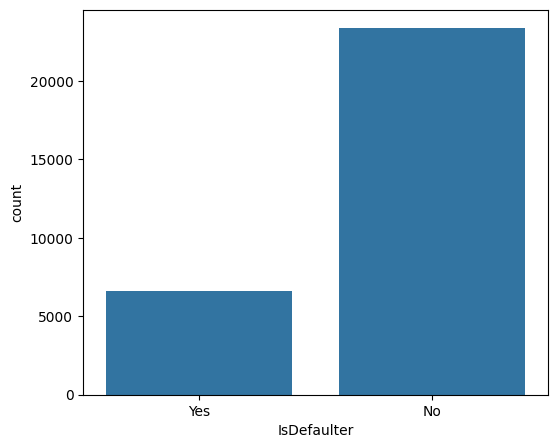

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
sns.countplot(x = 'IsDefaulter', data = data)

# the dataset is highly imbalanced with 'no' so we need to balance it with smote which add new data to the labels that has less count to equal with the most one

In [ ]:

#Value counts for sex category
data['SEX'].value_counts()


,count
SEX,
Female,18112
Male,11888


<Axes: xlabel='SEX', ylabel='count'>

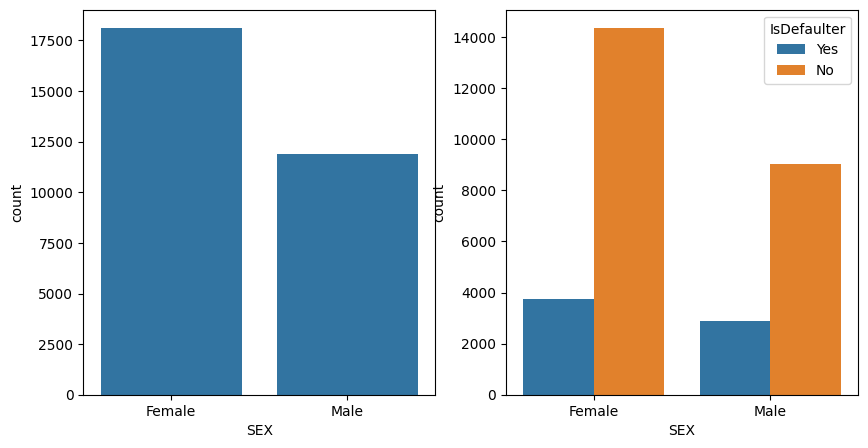

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = data)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = data)

In [ ]:
fil = (data['EDUCATION'] == 0) | (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 4)
data.loc[fil, 'EDUCATION'] = 'Others'

<Axes: xlabel='EDUCATION', ylabel='count'>

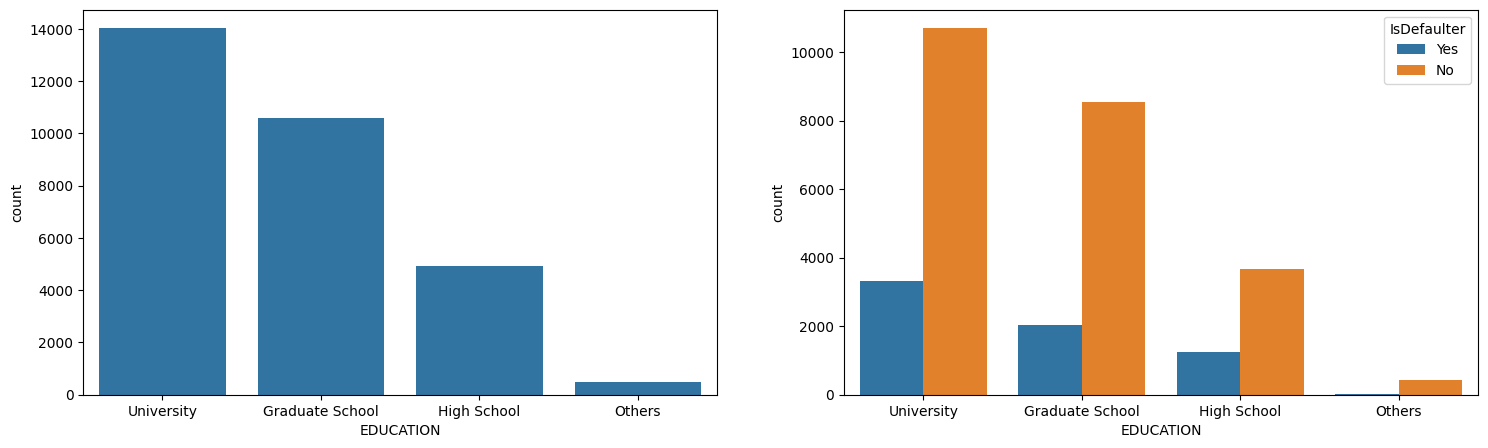

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = data)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = data)

In [ ]:
fil = data['MARRIAGE']==0
data.loc[fil,'MARRIAGE'] = 'Others'
data['MARRIAGE'].value_counts()

,count
MARRIAGE,
Single,15964
Married,13659
Others,377


<Axes: xlabel='MARRIAGE', ylabel='count'>

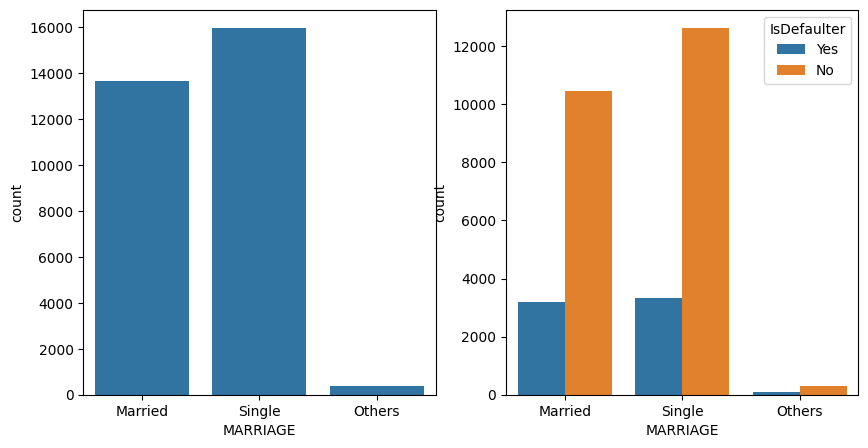

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = data)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = data)

<Axes: xlabel='AGE', ylabel='count'>

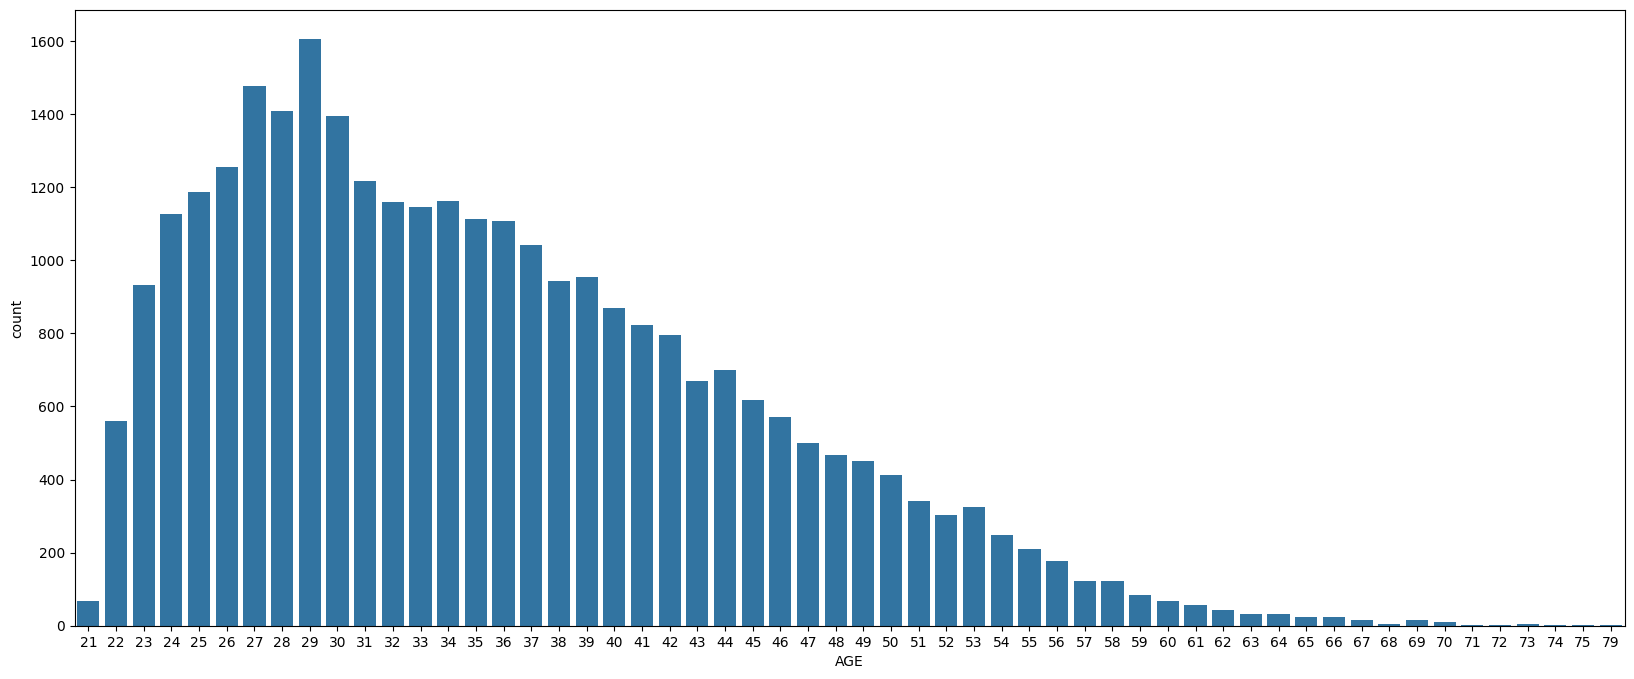

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = data)

In [ ]:
data.shape

(30000, 25)

In [ ]:
encode_num = {"SEX":{"Female":0,"Male":1}, "IsDefaulter":{"Yes":1,"No":0}}
data=data.replace(encode_num)

/tmp/ipython-input-1050931988.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace(encode_num)


In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,0,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data=pd.get_dummies(data,columns=["EDUCATION",'MARRIAGE'])
data.shape

(30000, 30)

In [ ]:
data.drop(['EDUCATION_Others','MARRIAGE_Others'],axis=1,inplace=True)
#this is very crucial step if we didnt delete it it creates dependency and might ghet problematic in modles like regression which need independency

In [ ]:
data.shape

(30000, 28)

In [ ]:
data=pd.get_dummies(data,columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [ ]:
data.shape

(30000, 80)

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,...,False,False,False,True,False,False,False,False,False,False
2,3,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,...,False,False,True,False,False,False,False,False,False,False
3,4,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,...,False,False,True,False,False,False,False,False,False,False
4,5,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,...,False,False,True,False,False,False,False,False,False,False


# Handling imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote, y_smote = smote.fit_resample(data[(i for i in list(data.describe(include='all').columns) if i != 'IsDefaulter')], data['IsDefaulter'])

print('Original unbalanced dataset shape', len(data))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [ ]:
balanced_data = pd.DataFrame(x_smote, columns=list(i for i in list(data.describe(include='all').columns) if i != 'IsDefaulter'))


In [ ]:
balanced_data['IsDefaulter'] = y_smote


<Axes: xlabel='IsDefaulter', ylabel='count'>

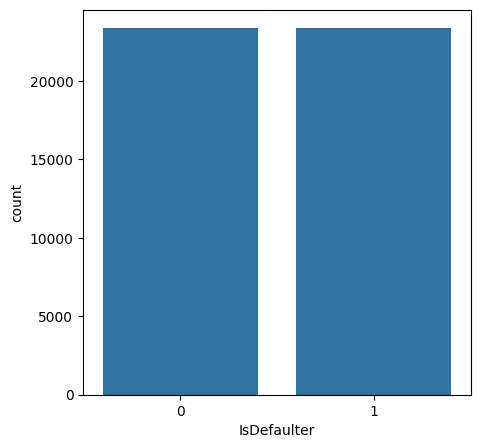

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='IsDefaulter', data = balanced_data  )

In [ ]:
balanced_data.drop('ID',axis=1,inplace=True)

In [ ]:
balanced_data.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
0,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1
1,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,False,False,True,False,False,False,False,False,False,1
2,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,False,True,False,False,False,False,False,False,False,0
3,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,False,True,False,False,False,False,False,False,False,0
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,False,True,False,False,False,False,False,False,False,0


In [ ]:
x=balanced_data.drop('IsDefaulter',axis=1)
y=balanced_data['IsDefaulter']

In [ ]:
print(x.shape)
y.shape

(46728, 78)


(46728,)

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(37382, 78)

# Logistic Regression

In [ ]:
logi = LogisticRegression(fit_intercept=True, max_iter=10000)
logi.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_logi = logi.predict(x_test)
y_train_pred_logi=logi.predict(x_train)

In [ ]:
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.862
The accuracy on test data is  0.857
The precision on test data is  0.772
The recall on test data is  0.93
The f1 on test data is  0.844
The roc_score on test data is  0.867


[[4390  274]
 [1066 3616]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

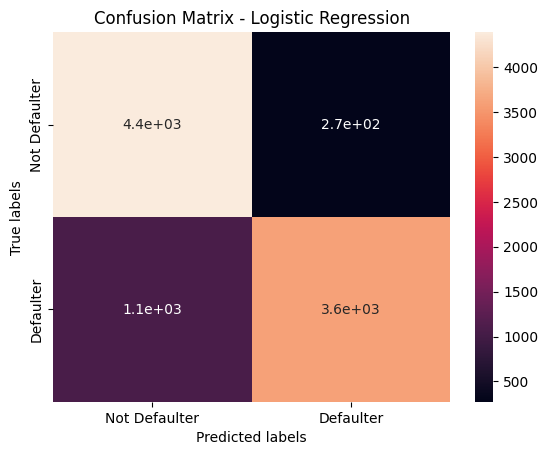

In [ ]:
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)


ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)


ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Decision tree classification

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc = dtc.predict(x_test)
y_train_pred_dtc=dtc.predict(x_train)

In [ ]:
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.811
The precision on test data is  0.814
The recall on test data is  0.809
The f1 on test data is  0.812
The roc_score on test data is  0.811


[[3763  901]
 [ 869 3813]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

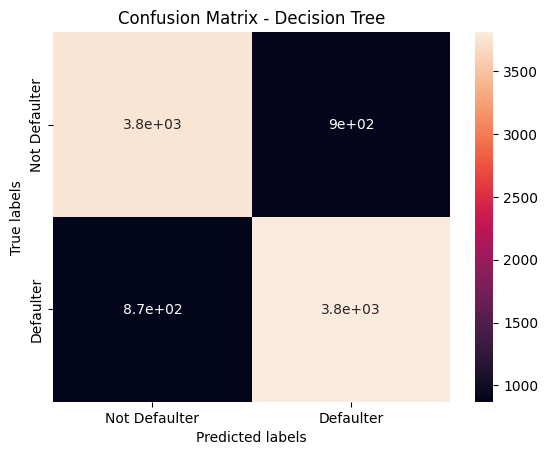

In [ ]:
labels = ['Not Defaulter', 'Defaulter']
cm_dt = confusion_matrix(y_test, y_pred_dtc )
print(cm_dt)

ax= plt.subplot()
sns.heatmap(cm_dt, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Random Forest Classification


In [ ]:
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred_rfc=rfc.predict(x_test)
y_train_pred_rfc=rfc.predict(x_train)

In [ ]:
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.876
The precision on test data is  0.831
The recall on test data is  0.914
The f1 on test data is  0.871
The roc_score on test data is  0.879


[[4300  364]
 [ 793 3889]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

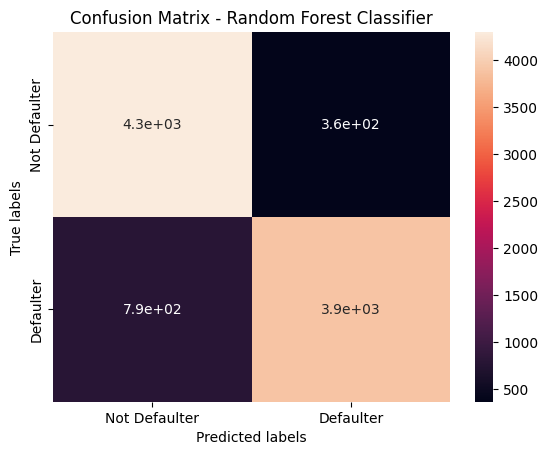

In [ ]:
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gbc=gbc.predict(x_test)
y_train_pred_gbc=gbc.predict(x_train)

In [ ]:
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.866
The accuracy on test data is  0.861
The precision on test data is  0.785
The recall on test data is  0.928
The f1 on test data is  0.85
The roc_score on test data is  0.87


[[4377  287]
 [1008 3674]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

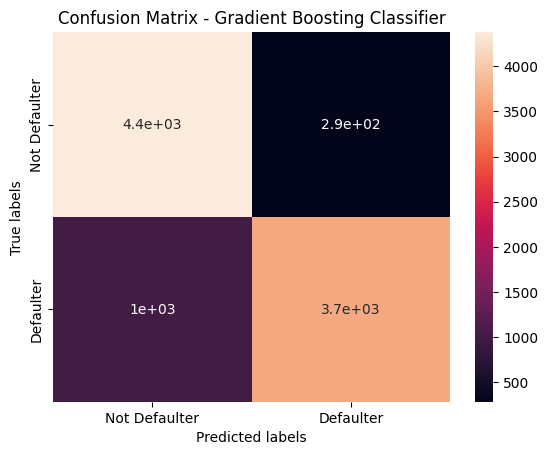

In [ ]:
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# SVM

In [ ]:
svm=SVC(probability=True)
svm.fit(x_train,y_train)

SVC(probability=True)

In [ ]:
y_pred_svm=svm.predict(x_test)
y_train_pred_svm=svm.predict(x_train)

In [ ]:
train_accuracy_svm = round(accuracy_score(y_train_pred_svm,y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm,y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm,y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm,y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm,y_test), 3)
roc_score_svm = round(roc_auc_score(y_pred_svm,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train data is  0.871
The accuracy on test data is  0.86
The precision on test data is  0.774
The recall on test data is  0.936
The f1 on test data is  0.847
The roc_score on test data is  0.871


[[4415  249]
 [1059 3623]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

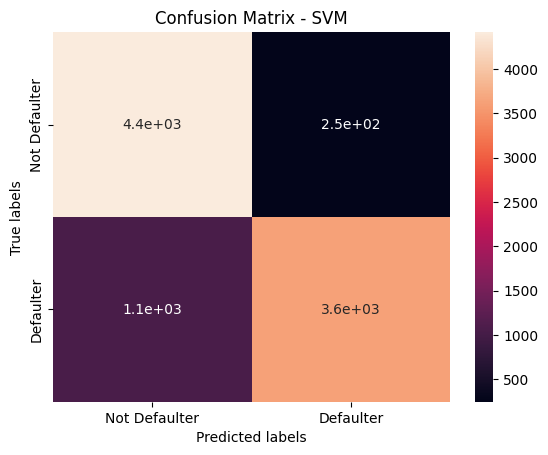

In [ ]:
labels = ['Not Defaulter', 'Defaulter']
cm_svm = confusion_matrix(y_test, y_pred_svm )
print(cm_svm)

ax= plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# XG BOOSTING

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb=xgb.predict(x_test)
y_train_pred_xgb=xgb.predict(x_train)

In [ ]:
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.911
The accuracy on test data is  0.867
The precision on test data is  0.797
The recall on test data is  0.927
The f1 on test data is  0.857
The roc_score on test data is  0.874


[[4371  293]
 [ 952 3730]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

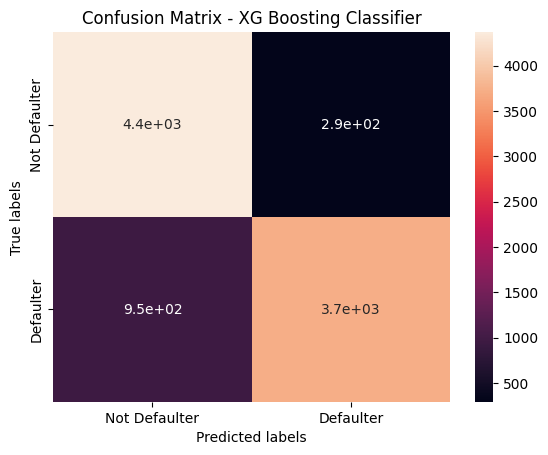

In [ ]:
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Baseline Model Comparision

In [ ]:
all_classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_svm, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_svm, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_svm, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc, recall_score_svm, recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_svm, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc, roc_score_svm, roc_score_gbc, roc_score_xgb]

In [ ]:
compare_df = pd.DataFrame({'Classifier':all_classifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})


In [ ]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)


,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
2,Random Forest,0.999,0.876,0.831,0.914,0.871,0.879
5,XG Boosting,0.911,0.867,0.797,0.927,0.857,0.874
4,Gradient Boosting,0.866,0.861,0.785,0.928,0.850,0.870
3,SVM,0.871,0.860,0.774,0.936,0.847,0.871
0,Logistic Regression,0.862,0.857,0.772,0.930,0.844,0.867
1,Decision Tree,1.000,0.811,0.814,0.809,0.812,0.811


# Random forest is having best test accuracy and f1 score

# Combined ROC curve for all models

In [ ]:
y_pred_proba_logi = logi.predict_proba(x_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(x_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(x_test)[:,1]
y_pred_proba_svm = svm.predict_proba(x_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(x_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(x_test)[:,1]

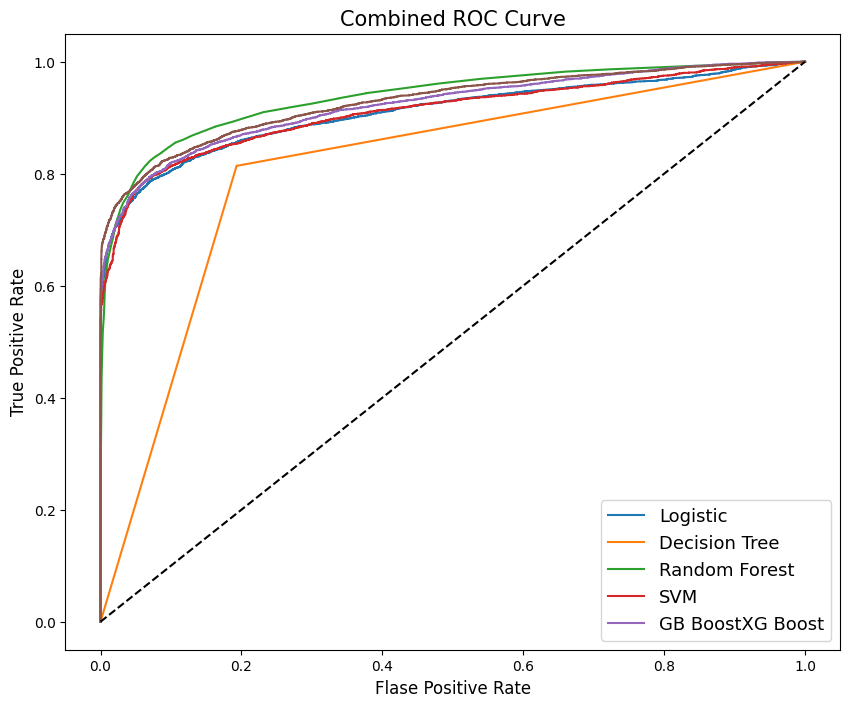

In [ ]:
fig = plt.figure(figsize=(10,8))

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_svm, tpr_svm, _svm = roc_curve(y_test,  y_pred_proba_svm)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_svm, tpr_svm)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "SVM", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

# Hyper parameter Tuning

# Logistic Regression Model

In [ ]:
penalties = ['l1','l2', 'elasticnet', 'none']

C= [0.0001, 0.001, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 5, 10]

param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500, 5000],
              'C' : C }

In [ ]:
logi = LogisticRegression()

logi_grid = GridSearchCV(estimator=logi,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
logi_grid.fit(x_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
600 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 5,
                               10],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbose=3)

In [ ]:
logi_grid.best_estimator_


LogisticRegression(C=0.5)

In [ ]:
logi_grid.best_params_


{'C': 0.5, 'max_iter': 100, 'penalty': 'l2'}

In [ ]:
logi_optimal_model = logi_grid.best_estimator_


In [ ]:
y_pred_logi_grid = logi_optimal_model.predict(x_test)
y_train_pred_logi_grid = logi_optimal_model.predict(x_train)

y_pred_prob_logi_grid = logi_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_logi_grid = logi_optimal_model.predict_proba(x_test)[:,1]

In [ ]:
train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_pred_logi_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi_grid)
print("The accuracy on test data is ", accuracy_logi_grid)
print("The precision on test data is ", precision_score_logi_grid)
print("The recall on test data is ", recall_score_logi_grid)
print("The f1 on test data is ", f1_score_logi_grid)
print("The auc on test data is ", auc_logi_grid)

The accuracy on train data is  0.862
The accuracy on test data is  0.856
The precision on test data is  0.772
The recall on test data is  0.929
The f1 on test data is  0.843
The auc on test data is  0.867


In [ ]:
train_cm_logi_grid = confusion_matrix(y_train,y_train_pred_logi_grid)
test_cm_logi_grid = confusion_matrix(y_test,y_pred_logi_grid )

In [ ]:
train_cm_logi_grid


array([[17585,  1115],
       [ 4033, 14649]])

In [ ]:
test_cm_logi_grid


array([[4388,  276],
       [1066, 3616]])

Decision Tree Classification

In [ ]:
depth_of_tree = [20,25,30,35]

min_samples_split = [0.001,0.01,0.05]

min_samples_leaf = [40,50,60]

param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [ ]:
dtc = DecisionTreeClassifier()

dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
dtc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [ ]:
dtc_grid.best_estimator_


DecisionTreeClassifier(max_depth=35, min_samples_leaf=40,
                       min_samples_split=0.01)

In [ ]:
dtc_grid.best_params_


{'max_depth': 35, 'min_samples_leaf': 40, 'min_samples_split': 0.01}

In [ ]:
dtc_optimal_model = dtc_grid.best_estimator_


In [ ]:
y_pred_dtc_grid=dtc_optimal_model.predict(x_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(x_train)

y_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(x_test)[:,1]

In [ ]:
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.843
The accuracy on test data is  0.827
The precision on test data is  0.757
The recall on test data is  0.881
The f1 on test data is  0.814
The auc on test data is  0.834


In [ ]:
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid )

In [ ]:
train_cm_dtc_grid


array([[16994,  1706],
       [ 4147, 14535]])

In [ ]:
test_cm_dtc_grid


array([[4187,  477],
       [1138, 3544]])

# Support Vector Machine

In [ ]:
param_dict = {'C':[1, 10] ,
              'kernel': ['rbf']}

In [ ]:
svm=SVC(probability=True)

svm_grid = RandomizedSearchCV(estimator = svm, param_distributions = param_dict,
                       cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')
svm_grid.fit(x_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [1, 10], 'kernel': ['rbf']},
                   scoring='roc_auc', verbose=2)

In [ ]:
svm_grid.best_estimator_

SVC(C=1, probability=True)

In [ ]:
svm_grid.best_params_

{'kernel': 'rbf', 'C': 1}

In [ ]:

svm_optimal_model = svm_grid.best_estimator_

In [ ]:
y_pred_svm_grid=svm_optimal_model.predict(x_test)
y_train_pred_svm_grid=svm_optimal_model.predict(x_train)

y_pred_prob_svm_grid = svm_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_svm_grid = svm_optimal_model.predict_proba(x_test)[:,1]

In [ ]:
train_accuracy_svm_grid = round(accuracy_score(y_train_pred_svm_grid,y_train), 3)
accuracy_svm_grid = round(accuracy_score(y_pred_svm_grid,y_test), 3)
precision_score_svm_grid = round(precision_score(y_pred_svm_grid,y_test), 3)
recall_score_svm_grid = round(recall_score(y_pred_svm_grid,y_test), 3)
f1_score_svm_grid = round(f1_score(y_pred_svm_grid,y_test), 3)
auc_svm_grid = round(roc_auc_score(y_pred_svm_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm_grid)
print("The accuracy on test data is ", accuracy_svm_grid)
print("The precision on test data is ", precision_score_svm_grid)
print("The recall on test data is ", recall_score_svm_grid)
print("The f1 on test data is ", f1_score_svm_grid)
print("The auc on test data is ", auc_svm_grid)

The accuracy on train data is  0.871
The accuracy on test data is  0.86
The precision on test data is  0.774
The recall on test data is  0.936
The f1 on test data is  0.847
The auc on test data is  0.871


In [ ]:
train_cm_svm_grid = confusion_matrix(y_train,y_train_pred_svm_grid)
test_cm_svm_grid = confusion_matrix(y_test,y_pred_svm_grid )

In [ ]:
train_cm_svm_grid


array([[17840,   860],
       [ 3952, 14730]])

In [ ]:
test_cm_svm_grid


array([[4415,  249],
       [1059, 3623]])

Random Forest Classifier

In [ ]:
n_estimators = [100,150,200]
max_depth = [10,20,30]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:

rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
rfc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  10.4s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   6.9s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.6s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   6.0s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   8.0s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   8.3s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   8.3s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.5s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [ ]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=200)

In [ ]:
rfc_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [ ]:
rfc_optimal_model = rfc_grid.best_estimator_

In [ ]:
y_pred_rfc_grid=rfc_optimal_model.predict(x_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(x_train)
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(x_test)[:,1]

In [ ]:
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)
print("The auc on test data is ", auc_rfc_grid)

The accuracy on train data is  0.851
The accuracy on test data is  0.841
The precision on test data is  0.793
The recall on test data is  0.877
The f1 on test data is  0.833
The auc on test data is  0.844


In [ ]:
train_cm_rfc_grid = confusion_matrix(y_train,y_train_pred_rfc_grid)
test_cm_rfc_grid = confusion_matrix(y_test,y_pred_rfc_grid )

In [ ]:
train_cm_rfc_grid

array([[16728,  1972],
       [ 3580, 15102]])

In [ ]:
test_cm_rfc_grid

array([[4145,  519],
       [ 967, 3715]])

In [ ]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [100,150,200]
max_depth = [10,20,30]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
gbc_grid.fit(x_train,y_train)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time= 2.7min
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time= 2.6min
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time= 3.1min
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time= 3.0min
[CV] END learning_rate=0.5, max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time= 1.6min
[CV] END learning_rate=0.5, max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time= 1.6min
[CV] END learning_rate=0.5, max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time= 2.0min
[CV] END learning_rate=0.5, max_depth=20, min_samples_leaf=40, min_samples_split=50, n_

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [ ]:
gbc_grid.best_estimator_


GradientBoostingClassifier(max_depth=10, min_samples_leaf=50,
                           min_samples_split=150, n_estimators=200,
                           random_state=42)

In [ ]:
gbc_grid.best_params_


{'n_estimators': 200,
 'min_samples_split': 150,
 'min_samples_leaf': 50,
 'max_depth': 10,
 'learning_rate': 0.1}

In [ ]:
gbc_optimal_model = gbc_grid.best_estimator_


In [ ]:
y_pred_gbc_grid=gbc_optimal_model.predict(x_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(x_train)

y_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(x_test)[:,1]

In [ ]:
train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc_grid)
print("The accuracy on test data is ", accuracy_gbc_grid)
print("The precision on test data is ", precision_score_gbc_grid)
print("The recall on test data is ", recall_score_gbc_grid)
print("The f1 on test data is ", f1_score_gbc_grid)
print("The auc on test data is ", auc_gbc_grid)

The accuracy on train data is  0.933
The accuracy on test data is  0.871
The precision on test data is  0.808
The recall on test data is  0.926
The f1 on test data is  0.863
The auc on test data is  0.877


In [ ]:
train_cm_gbc_grid = confusion_matrix(y_train,y_train_pred_gbc_grid)
test_cm_gbc_grid = confusion_matrix(y_test,y_pred_gbc_grid )

In [ ]:
train_cm_gbc_grid


array([[18348,   352],
       [ 2140, 16542]])

In [ ]:
test_cm_gbc_grid


array([[4360,  304],
       [ 899, 3783]])

# XGBOOSTING

In [ ]:
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [ ]:
xgb = XGBClassifier()

xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
xgb_grid.fit(x_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:07:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [ ]:
xgb_grid.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=1, min_samples_leaf=50,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=250, n_jobs=None, ...)

In [ ]:
xgb_grid.best_params_


{'n_estimators': 250,
 'min_samples_leaf': 50,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.2}

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_


In [ ]:
y_pred_xgb_grid=xgb_optimal_model.predict(x_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(x_train)

y_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(x_test)[:,1]

In [ ]:
train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
auc_xgb_grid = round(roc_auc_score(y_pred_xgb_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb_grid)
print("The accuracy on test data is ", accuracy_xgb_grid)
print("The precision on test data is ", precision_score_xgb_grid)
print("The recall on test data is ", recall_score_xgb_grid)
print("The f1 on test data is ", f1_score_xgb_grid)
print("The auc on test data is ", auc_xgb_grid)

The accuracy on train data is  0.99
The accuracy on test data is  0.873
The precision on test data is  0.812
The recall on test data is  0.925
The f1 on test data is  0.865
The auc on test data is  0.878


In [ ]:
train_cm_xgb_grid = confusion_matrix(y_train,y_train_pred_xgb_grid)
test_cm_xgb_grid = confusion_matrix(y_test,y_pred_xgb_grid )

In [ ]:
train_cm_xgb_grid

array([[18666,    34],
       [  329, 18353]])

In [ ]:
test_cm_xgb_grid

array([[4356,  308],
       [ 882, 3800]])

Final Model Comparision

In [ ]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Decision Tree', 'Optimal Random Forest', 'Optimal SVM', 'Optimal Gradient Boosting', 'Optimal XG Boosting']
grid_train_accuracy = [train_accuracy_logi_grid, train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_svm_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [accuracy_logi_grid, accuracy_dtc_grid, accuracy_rfc_grid, accuracy_svm_grid, accuracy_gbc_grid, accuracy_xgb_grid]
grid_precision_score = [precision_score_logi_grid, precision_score_dtc_grid, precision_score_rfc_grid, precision_score_svm_grid, precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_logi_grid, recall_score_dtc_grid, recall_score_rfc_grid, recall_score_svm_grid, recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_logi_grid, f1_score_dtc_grid, f1_score_rfc_grid, f1_score_svm_grid, f1_score_gbc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_logi_grid, auc_dtc_grid, auc_rfc_grid, auc_svm_grid, auc_gbc_grid, auc_xgb_grid]

In [ ]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})


In [ ]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()


In [ ]:
all_comparision_df.drop('index', axis=1, inplace=True)


In [ ]:
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)


In [ ]:
all_comparision_df


,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
2,Random Forest,0.999,0.876,0.831,0.914,0.871,0.879
11,Optimal XG Boosting,0.990,0.873,0.812,0.925,0.865,0.878
10,Optimal Gradient Boosting,0.933,0.871,0.808,0.926,0.863,0.877
5,XG Boosting,0.911,0.867,0.797,0.927,0.857,0.874
3,SVM,0.871,0.860,0.774,0.936,0.847,0.871
9,Optimal SVM,0.871,0.860,0.774,0.936,0.847,0.871
4,Gradient Boosting,0.866,0.861,0.785,0.928,0.850,0.870
0,Logistic Regression,0.862,0.857,0.772,0.930,0.844,0.867
6,Optimal Logistic Regression,0.862,0.856,0.772,0.929,0.843,0.867
8,Optimal Random Forest,0.851,0.841,0.793,0.877,0.833,0.844


# from all baseline models Random Forest gives gives best results.

# from optimal models xg boosting gives best results

# Cross validation and hyperparameter tunning certainly reduces chances of overfitting and also increases performance of model.

# recall score is a imp metric here which say out of actual defaulter how many are correctly predicted and for a unbalanced dataset like this it would be a vitlal metric.


# Now lets move on to Clustering Analysis

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 👉 Load your dataset directly
df = pd.read_csv("/content/UCI_Credit_Card.csv")

# 👉 Select numeric columns (remove ID)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "ID" in numeric_cols:
    numeric_cols.remove("ID")

print("Using numeric columns:", numeric_cols)

# 👉 Build feature matrix
X = df[numeric_cols].values

print("Feature matrix shape:", X.shape)


Using numeric columns: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']
Feature matrix shape: (30000, 24)


In [3]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('Scaled shape:', X_scaled.shape)

Scaled shape: (30000, 24)


Explained variance ratio (first 10): [0.272986   0.17506325 0.06470853 0.06147268 0.0433527  0.04060177
 0.03816822 0.03779115 0.03692565 0.03630195]
Cumulative explained variance (first 10): [0.272986   0.44804925 0.51275778 0.57423046 0.61758316 0.65818493
 0.69635315 0.7341443  0.77106995 0.8073719 ]


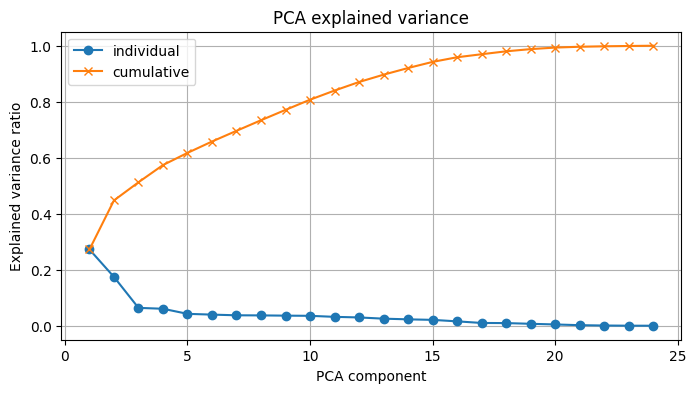

2-component PCA shape: (30000, 2)


In [4]:
pca_full = PCA(n_components=min(X_scaled.shape[1], X_scaled.shape[0]))
pca_full.fit(X_scaled)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print('Explained variance ratio (first 10):', explained[:10])
print('Cumulative explained variance (first 10):', cum_explained[:10])

plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(explained)+1), explained, marker='o', label='individual')
plt.plot(np.arange(1, len(explained)+1), cum_explained, marker='x', label='cumulative')
plt.xlabel('PCA component'); plt.ylabel('Explained variance ratio')
plt.title('PCA explained variance'); plt.legend(); plt.grid(True); plt.show()

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
print('2-component PCA shape:', X_pca2.shape)

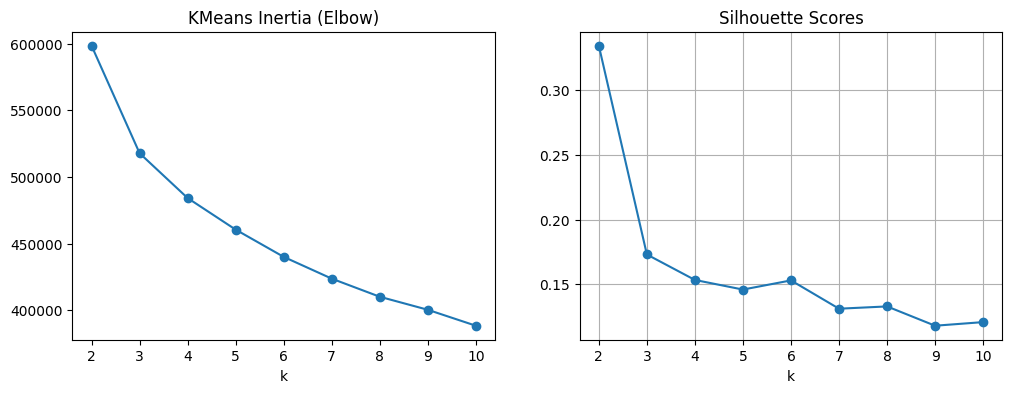

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# ----- Step 1: compute inertia + silhouette for a range of k -----
K_range = range(2, 11)
inertias = []
sil_scores = []

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    inertias.append(model.inertia_)

    # silhouette only valid if >1 cluster
    sil = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else np.nan
    sil_scores.append(sil)

# ----- Step 2: plot elbow + silhouette -----
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(K_range, inertias, marker='o')
ax[0].set_title("KMeans Inertia (Elbow)")
ax[0].set_xlabel("k")

ax[1].plot(K_range, sil_scores, marker='o')
ax[1].set_title("Silhouette Scores")
ax[1].set_xlabel("k")
ax[1].grid(True)

plt.show()



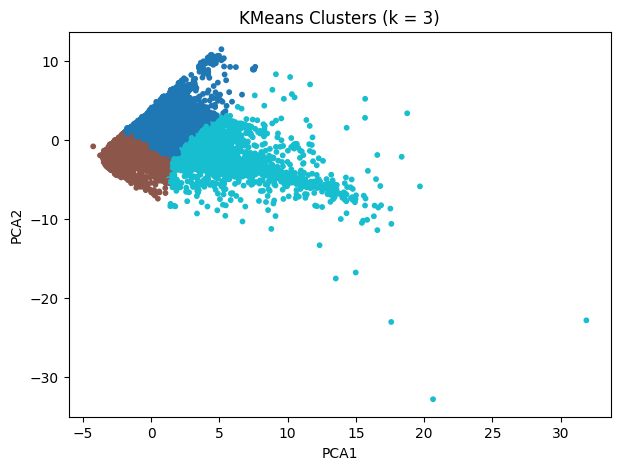

Silhouette Score: 0.17293410854366026


In [7]:
# here from the graph we can see we can k=3 is better from silhoutte score bad medium better

best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
klabels = kmeans.fit_predict(X_scaled)

df["kmeans_cluster"] = klabels

# ----- Step 5: PCA plot -----
plt.figure(figsize=(7,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=klabels, s=10, cmap='tab10')
plt.title(f"KMeans Clusters (k = {best_k})")
plt.xlabel("PCA1"); plt.ylabel("PCA2")
plt.show()

print("Silhouette Score:", silhouette_score(X_scaled, klabels))


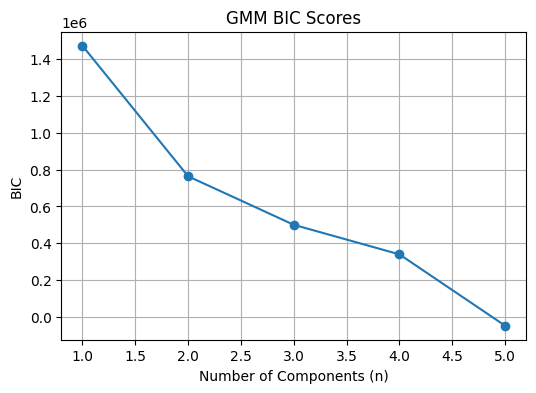

Implementing GMM with n = 3


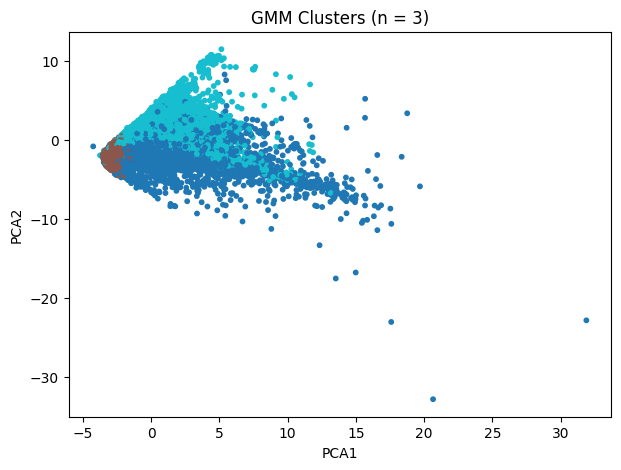

GMM Silhouette Score: 0.07410009366419462


In [8]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

bic_scores = []
n_range = range(1, 6)

for n in n_range:
    gmm_temp = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm_temp.fit(X_scaled)
    bic_scores.append(gmm_temp.bic(X_scaled))

plt.figure(figsize=(6,4))
plt.plot(n_range, bic_scores, marker='o')
plt.title("GMM BIC Scores")
plt.xlabel("Number of Components (n)")
plt.ylabel("BIC")
plt.grid(True)
plt.show()

best_n = 3
print(f"Implementing GMM with n = {best_n}")

gmm = GaussianMixture(n_components=best_n, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

df["gmm_cluster"] = gmm_labels

plt.figure(figsize=(7,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=gmm_labels, s=10, cmap='tab10')
plt.title(f"GMM Clusters (n = {best_n})")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

print("GMM Silhouette Score:", silhouette_score(X_scaled, gmm_labels))


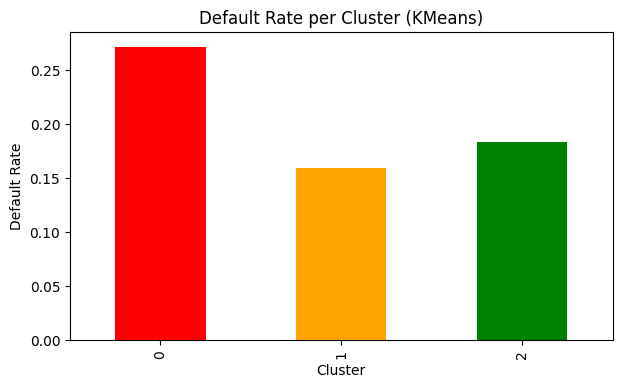

Default Rates:
kmeans_cluster
0    0.2714
1    0.1588
2    0.1833
Name: default.payment.next.month, dtype: float64


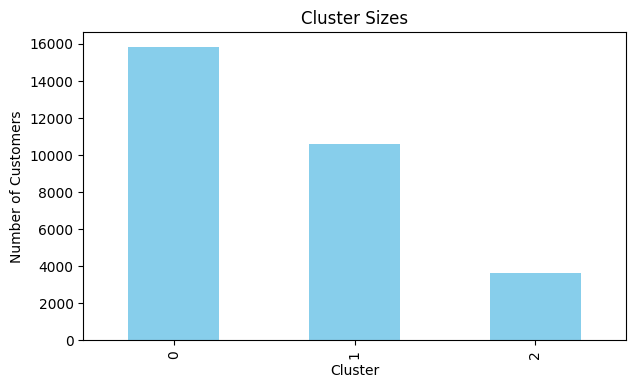


Cluster Sizes:
kmeans_cluster
0    15838
1    10556
2     3606
Name: count, dtype: int64

Cluster Feature Means:
                LIMIT_BAL    AGE  PAY_0  PAY_2  BILL_AMT1  PAY_AMT1
kmeans_cluster                                                     
0               105573.43  34.52   0.42   0.46   44690.84   3727.54
1               220788.18  36.41  -0.77  -1.15   10306.16   4890.98
2               283365.97  37.02   0.25   0.21  199693.48  16428.60

FINAL CONCLUSION:

Cluster 0 represents the highest-risk customers, showing the highest probability of default.
Cluster 1 represents the most financially disciplined customers, with the lowest default rate.

The behavioral profiles reveal:
- High-risk customers tend to have higher bill amounts, higher repayment delays, and lower repayment consistency.
- Low-risk customers maintain lower bill amounts, repay on time, and show strong financial management.
- Medium-risk customers fluctuate between the two extremes.

These insights help segment

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

target = "default.payment.next.month"

default_rates = df.groupby("kmeans_cluster")[target].mean()

plt.figure(figsize=(7,4))
default_rates.plot(kind='bar', color=['red','orange','green'])
plt.title("Default Rate per Cluster (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Default Rate")
plt.show()

print("Default Rates:")
print(default_rates.round(4))


cluster_sizes = df["kmeans_cluster"].value_counts().sort_index()

plt.figure(figsize=(7,4))
cluster_sizes.plot(kind='bar', color='skyblue')
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

print("\nCluster Sizes:")
print(cluster_sizes)


features = ["LIMIT_BAL","AGE","PAY_0","PAY_2","BILL_AMT1","PAY_AMT1"]

cluster_means = df.groupby("kmeans_cluster")[features].mean()




print("\nCluster Feature Means:")
print(cluster_means.round(2))

high_risk = default_rates.idxmax()
low_risk = default_rates.idxmin()

print("\nFINAL CONCLUSION:\n")
print(f"Cluster {high_risk} represents the highest-risk customers, showing the highest probability of default.")
print(f"Cluster {low_risk} represents the most financially disciplined customers, with the lowest default rate.\n")

print("The behavioral profiles reveal:")
print("- High-risk customers tend to have higher bill amounts, higher repayment delays, and lower repayment consistency.")
print("- Low-risk customers maintain lower bill amounts, repay on time, and show strong financial management.")
print("- Medium-risk customers fluctuate between the two extremes.\n")

print("These insights help segment customers for credit risk management, targeted interventions, and limit adjustments.")
